In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('default')
import seaborn as sns


import sys, re, time, json
from PSlim import Experiment, get_eps, ROC

#pyslurm = None

In [2]:
pd.read_csv('outs_weights_experiment/branchFn.csv')

,start,end,N,SS,ZngE,TajD,FulD,FayH,bsfs,FerL,btree,Colless,path,iColless,ibtree
0,0,100001.0,50,335,-0.149822,-0.113932,-0.991388,0.004407,0.010943,0.104020,0.651571,0.106984,3000000,0.111656,0.343558
1,0,100001.0,50,393,-0.226244,-0.208848,0.702630,0.001444,-0.126343,0.135150,-0.290507,0.144120,3000001,0.167841,-0.627811
2,0,100001.0,50,353,-0.585879,-0.209633,1.112364,0.050159,-0.186444,0.545308,0.571566,0.114934,3000002,0.134759,-0.813980
3,0,100001.0,50,384,0.846705,0.003940,-0.745864,-0.114110,-0.396958,-0.963769,-0.341380,0.131950,3000003,0.153099,-0.596749
4,0,100001.0,50,385,0.478612,-0.140178,0.016508,-0.084400,-0.701019,-0.628621,0.238925,0.128919,3000004,0.136813,-0.526873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0,100001.0,50,434,-0.171041,-0.098816,0.154918,0.009314,0.065026,0.136867,-0.161353,0.133685,3000245,0.136434,-0.482128
246,0,100001.0,50,445,0.677449,1.039043,-0.795964,0.053551,1.764365,-0.160228,1.293497,0.104752,3000246,0.125128,0.223553
247,0,100001.0,50,446,0.396424,0.042535,-0.668690,-0.047601,-0.419238,-0.427096,-0.117425,0.142772,3000247,0.141714,-0.733247
248,0,100001.0,50,455,0.181868,0.240148,-0.818386,0.008965,0.421802,-0.065848,0.079680,0.127742,3000248,0.150092,-0.775619


In [6]:
stats = ['ibtree']

none 0.7783946666666667
split 0.794544
branch 0.7761866666666667


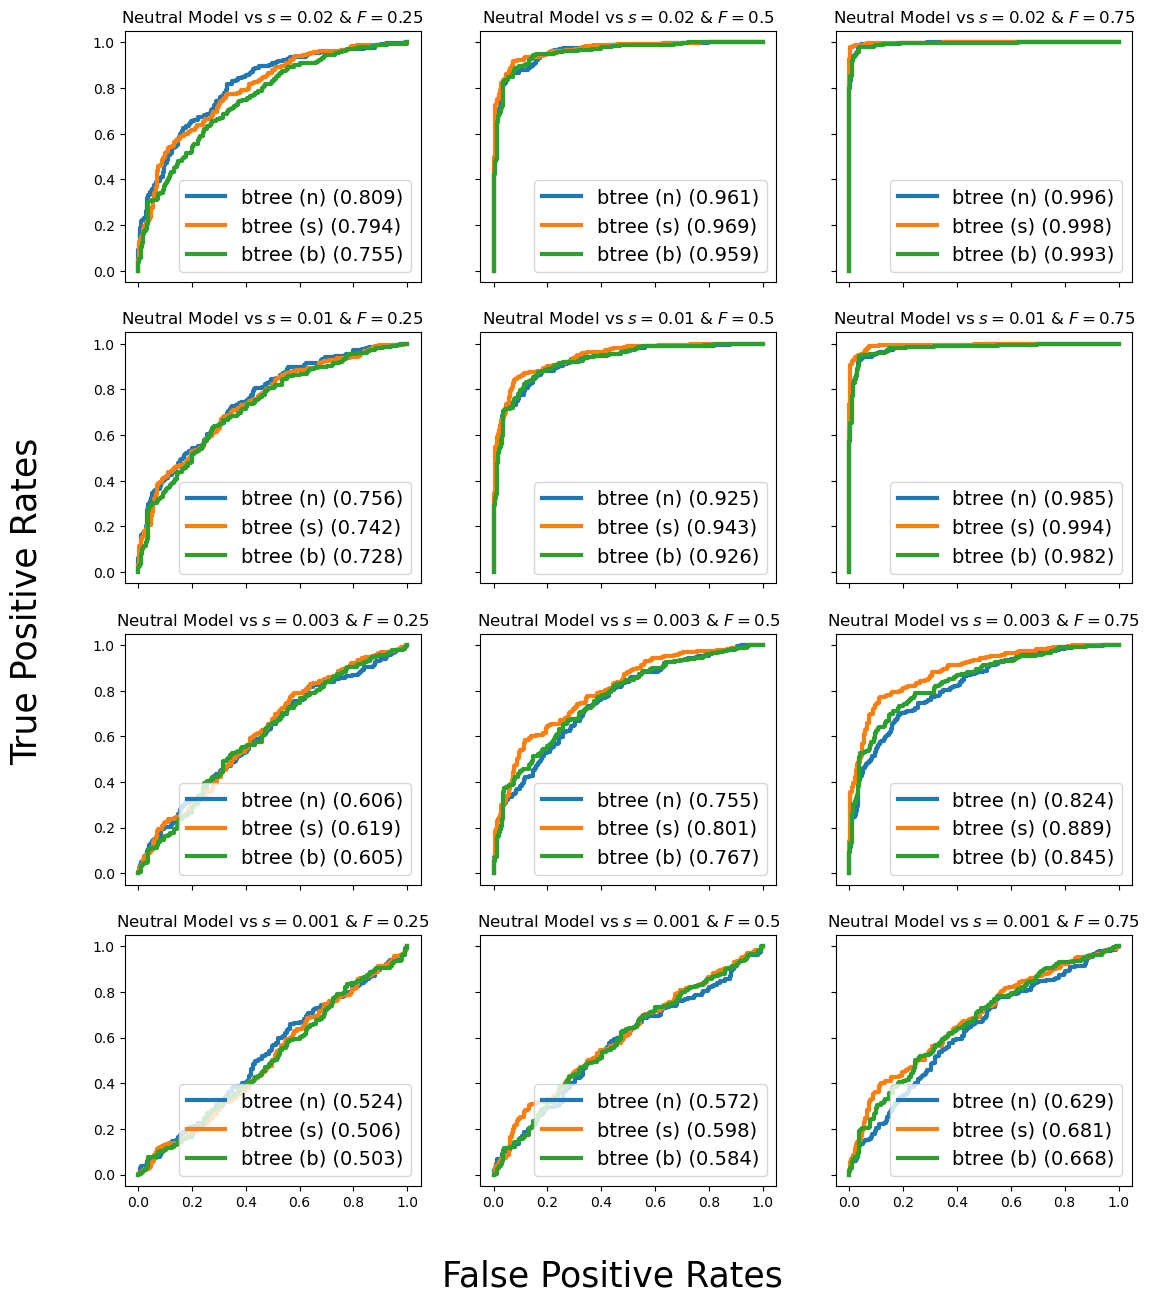

In [20]:
fig, ax = plt.subplots(4,3,figsize = (13,15), sharex = True, sharey = True)

for treew in ['none', 'split','branch']:
    
    aucs = {stat:[] for stat in stats}
    for j, s in enumerate([0.02, 0.01, 0.003, 0.001]):


        Vs = [['Fn', 's='+str(s)+'F='+str(F)] for F in [0.25,0.5,0.75]]
        names = [['Neutral Model', '$s='+str(s)+'$ & $F='+str(F)+'$'] for F in [0.25,0.5,0.75]]

        for i, vs in zip(range(len(Vs)), Vs):
            for key in stats:
                k1, k2 = vs
                df1 = pd.read_csv('outs_weights_experiment/'+treew+k1+'.csv')
                df2 = pd.read_csv('outs_weights_experiment/'+treew+k2+'.csv')
                for pos in ['iColless', 'FulD']:
                    df1[pos] = -df1[pos]
                    df2[pos] = -df2[pos]

                if key == 'ibtree':
                    label = 'btree ('+treew[0]+')'
                elif key == 'iColless':
                    label = 'Colless'
                else:
                    label = key

                auc = ROC(ax[j, i], df1[key], df2[key], score_ascending = False, label = label)

                aucs[key].append(auc)

            handles, labels = ax[j,i].get_legend_handles_labels()
            ax[j, i].legend(loc = 'lower right', prop={'size': 14})


        for i, vs in zip(range(len(Vs)), Vs):
            k1, k2 = vs
            ax[j, i].set_title(names[i][0]+' vs '+names[i][1])
            
    print(treew, np.mean(aucs[key]))

fig.text(0.5, 0.05, 'False Positive Rates', ha='center', va='center', size = 25)
fig.text(0.05, 0.5, 'True Positive Rates', rotation = 90, ha='center', va='center', size = 25)
#plt.tight_layout()
plt.savefig('plots/Directional_treew.jpg', dpi = 300)

none 0.6360746666666666
split 0.6588959999999999
branch 0.6955840000000001


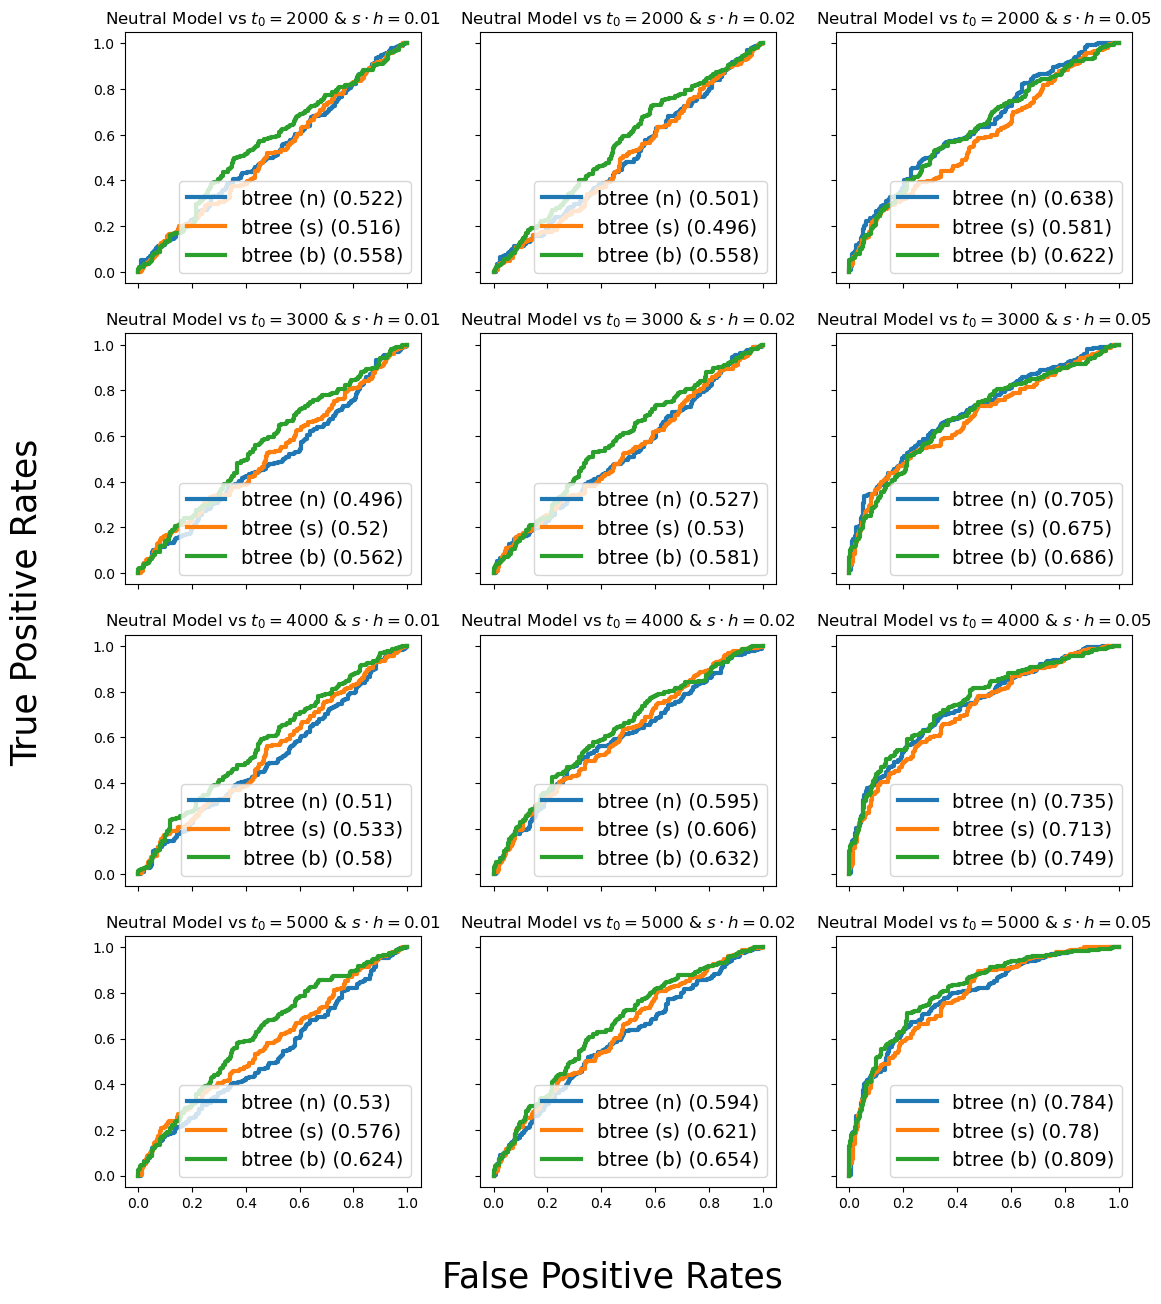

In [22]:
fig, ax = plt.subplots(4,3,figsize = (13,15), sharex = True, sharey = True)
h = 25
for treew in ['none', 'split','branch']:

    for j, Until in enumerate([2000, 3000, 4000, 5000]):

        Vs = [['Neut', 'until='+str(Until)+'s='+str(s)] for s in [0.01/h, 0.02/h, 0.05/h]]
        names = [['Neutral Model', '$t_0='+str(Until)+'$ & $s\cdot h='+str(s*h)+'$'] for s in [0.01/h, 0.02/h, 0.05/h]]
        
        aucs = {stat:[] for stat in stats}
        for i, vs in zip(range(len(Vs)), Vs):
            for key in stats:
                k1, k2 = vs
                df1 = pd.read_csv('outs_weights_experiment/'+treew+k1+'.csv')
                df2 = pd.read_csv('outs_weights_experiment/'+treew+k2+'.csv')
                for pos in ['iColless', 'FulD']:
                    df1[pos] = -df1[pos]
                    df2[pos] = -df2[pos]

                if key == 'ibtree':
                    label = 'btree ('+treew[0]+')'
                elif key == 'iColless':
                    label = 'Colless'
                else:
                    label = key

                auc = ROC(ax[j, i], df1[key], df2[key], score_ascending = True, label = label)
                aucs[key].append(auc)




            handles, labels = ax[j,i].get_legend_handles_labels()
            ax[j, i].legend(loc = 'lower right', prop={'size': 14})


        for i, vs in zip(range(len(Vs)), Vs):
            k1, k2 = vs
            ax[j, i].set_title(names[i][0]+' vs '+names[i][1])
    
    print(treew, np.mean(aucs[key]))
    
fig.text(0.5, 0.05, 'False Positive Rates', ha='center', va='center', size = 25)
fig.text(0.05, 0.5, 'True Positive Rates', rotation = 90, ha='center', va='center', size = 25)
plt.savefig('plots/Balancing_treew.jpg', dpi = 300)